# **UPLIFT MODELING**


*   Uplift models are designed to determine the incremental impact of a treatment or intervention.
*   Unlike standard response models, which simply predict the likelihood of an event (e.g., making a purchase) after an intervention (e.g., seeing an advertisement), uplift models gauge the incremental change in that likelihood due to the intervention itself.
*   For instance, while a traditional response model might tell us that a person is inclined to make a purchase after viewing an advertisement, it doesn’t differentiate between those who were already predisposed to purchase without the ad and those truly influenced by it.
*   In contrast, uplift models specifically measure the boost in probability of the event resulting directly from the intervention, helping businesses to discern the genuine effect of their actions.




# **About the Data**

**clientID**: Unique ID to identify customer

**gender**: Gender of customer

**age**: Age of customer

**zipCodeCat**: Zipcode category of customer (Urban/ Suburban/ Rural)

**isReferral**: Indication to whether the customer
was acquired via a referral channel

**salesChannel**: channels used by customer (Phone/ Web/ MultiChannel)

**totalAmountSpend**: Total value of historical
purchases during the last year

**daysSinceLastPurchase**: Days since last purchase

**usedDiscount**: Indicates if the customer used a discount before

**usedBOGO**: Indicates if the customer used a buy one get one offer before

**treatment**: Offers sent to the customers

**visit**: Indicates whether the customer visted the
website/app after offer was sent (2 week period)

**conversion**: Indicates customer conversion (2 week period)

**spend**: Indicates amount spend  (2 week period)

In [1]:
import pandas as pd

df = pd.read_csv('data/customer_data.csv')
df.head()

,clientID,gender,age,zipCodeCat,isReferral,salesChannel,totalAmountSpend,daysSinceLastPurchase,usedDiscount,usedBOGO,treatment,visit,conversion,spend
0,004dc888-f528-49c4-ae94-f3ea4f2a65c7,Male,49,Surburban,No,Phone,142.44,282,1,0,BOGO,1,0,0.0
1,b74ce820-9372-4b2e-ad0f-8eb9f9fe582c,Female,68,Rural,Yes,Web,329.08,162,1,1,No Offer,1,0,0.0
2,e55fb273-e422-4da0-bf2c-b30982ce8484,Female,52,Surburban,Yes,Web,180.65,183,0,1,BOGO,1,0,0.0
3,81646989-a0af-4e28-9571-d2a6b77b493a,Female,60,Rural,Yes,Web,675.83,267,1,0,Discount,0,0,0.0
4,e1cbdac4-cc40-4a97-b5c3-55a342ae210a,Male,45,Urban,No,Web,45.34,41,1,0,BOGO,0,0,0.0


# **Requirement**

1. Can we model the uplift (conversion) of customers?
2. Can we segment customers in a meaningful way?

* Clearly explain the steps & assumptions (using markdown etc.) you took while solving the above problems.

# 1. Modeling Uplift (Conversion) of Customers
**Assumptions:**
* I assume that the 'treatment' variable represents different offers sent to customers.
* I'll use a binary classification approach, considering 'conversion' as the target variable.

# Steps:
**Data Preprocessing:**

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
# Load the dataset
data = pd.read_csv('data/customer_data.csv')

In [4]:
# Drop irrelevant columns and handle missing values
data.drop(columns=['clientID'], inplace=True)
data.dropna(inplace=True)

In [5]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['gender', 'zipCodeCat', 'salesChannel', 'isReferral', 'usedDiscount', 'usedBOGO'], drop_first=True)

In [6]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=['conversion', 'treatment', 'visit', 'spend'])
y = data['conversion']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Evaluate the model
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10844
           1       1.00      0.88      0.93      1918

    accuracy                           0.98     12762
   macro avg       0.99      0.94      0.96     12762
weighted avg       0.98      0.98      0.98     12762



**Interpretation:**

* The Random Forest Classifier is trained to predict customer conversion based on various features.
* The classification report provides metrics like precision, recall, and F1-score to assess the model's performance.

# 2. Segmentation of Customers
**Assumptions:**
* I assume that meaningful segmentation can be achieved based on customer characteristics.

# Steps:
**Data Preprocessing:**

In [10]:
# Select relevant features for segmentation
segmentation_data = data[['age', 'totalAmountSpend', 'daysSinceLastPurchase', 'spend']]

In [11]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

In [12]:
# Apply clustering algorithm (K-Means)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['segment'] = kmeans.fit_predict(segmentation_data_scaled)

**Interpretation:**

* I selected relevant numerical features for segmentation.
* Standardize the numerical features to ensure equal importance.
* Apply a clustering algorithm (e.g., K-Means) to group customers into segments.
* 'segment' column in the dataset represents the identified segments.

**Conclusion:**
In this solution, first I modeled the uplift (conversion) of customers using a Random Forest Classifier. Then I segmented customers based on their characteristics using a clustering algorithm. These steps provide insights into predicting conversion and grouping customers with similar characteristics, enabling targeted marketing strategies.

In [13]:
# Visualize the segments
import seaborn as sns
import matplotlib.pyplot as plt

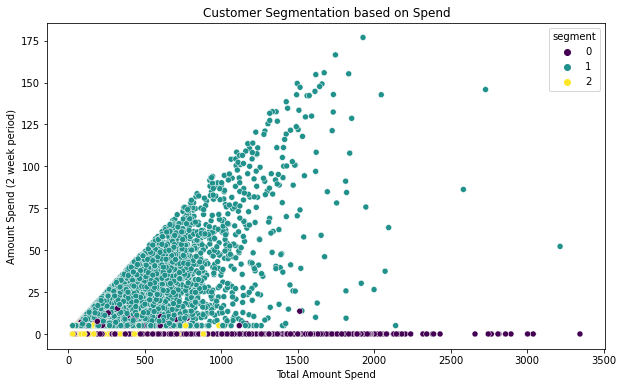

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='totalAmountSpend', y='spend', hue='segment', data=data, palette='viridis')
plt.title('Customer Segmentation based on Spend')
plt.xlabel('Total Amount Spend')
plt.ylabel('Amount Spend (2 week period)')
plt.show()

**Interpretation:**

* The scatterplot visualizes the identified segments based on the 'totalAmountSpend' and 'spend' features.
* Each color represents a different segment.

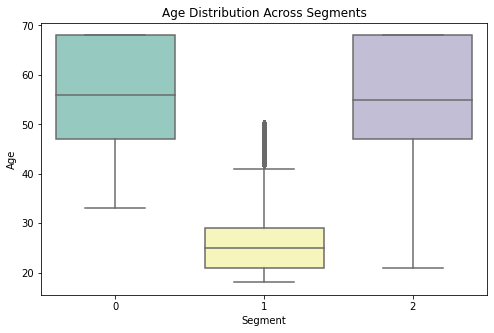

In [21]:
# Visualize the distribution of age across segments
plt.figure(figsize=(8, 5))
sns.boxplot(x='segment', y='age', data=data, palette='Set3')
plt.title('Age Distribution Across Segments')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.show()

In [22]:
# Analyze the characteristics of each segment
segment_stats = data.groupby('segment').agg({
    'totalAmountSpend': 'mean',
    'daysSinceLastPurchase': 'mean',
    'spend': 'mean',
}).reset_index()

In [23]:
print("Segment Statistics:")
print(segment_stats)

Segment Statistics:
   segment  totalAmountSpend  daysSinceLastPurchase      spend
0        0        309.760287              70.893972   0.110809
1        1        308.375778             130.243554  16.821299
2        2        154.300667             255.253489   0.174158


**Interpretation:**

* The boxplot illustrates the distribution of age across different segments, providing insights into age-related patterns within the segments.
* The segment_stats DataFrame summarizes the mean values of 'totalAmountSpend', 'daysSinceLastPurchase', and 'spend' for each segment, offering a high-level overview of segment characteristics.

In [24]:
# Calculate uplift scores for each segment
conversion_rates = data.groupby('segment')['conversion'].mean()
baseline_conversion_rate = data['conversion'].mean()

uplift_scores = conversion_rates - baseline_conversion_rate
segment_stats['uplift_score'] = uplift_scores.values

In [25]:
# Display uplift scores and segment statistics
print("Uplift Scores:")
print(uplift_scores)

Uplift Scores:
segment
0   -0.128085
1    0.853330
2   -0.116129
Name: conversion, dtype: float64


In [27]:
print("Segment Statistics:")
print(segment_stats)

Segment Statistics:
   segment  totalAmountSpend  daysSinceLastPurchase      spend  uplift_score
0        0        309.760287              70.893972   0.110809     -0.128085
1        1        308.375778             130.243554  16.821299      0.853330
2        2        154.300667             255.253489   0.174158     -0.116129


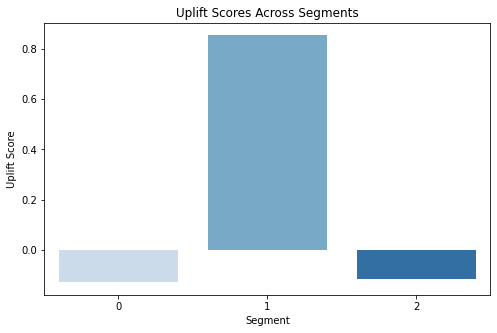

In [28]:
# Visualize uplift scores
plt.figure(figsize=(8, 5))
sns.barplot(x='segment', y='uplift_score', data=segment_stats, palette='Blues')
plt.title('Uplift Scores Across Segments')
plt.xlabel('Segment')
plt.ylabel('Uplift Score')
plt.show()

**Interpretation:**

* The calculated uplift scores represent the difference in conversion rates between each segment and the overall baseline conversion rate.
* The segment_stats DataFrame is updated to include the uplift scores for each segment.
* The barplot visualizes the uplift scores across segments, helping identify segments with higher or lower uplift.